In [1]:
# Importing Dependencies
import pandas as pd
import requests
from bs4 import BeautifulSoup
import Links as ls

In [2]:
# Importing Batting URLs
# print(ls.Team_Batting_2007_url)

In [3]:
# url = ls.Team_Batting_2024_url
# response= requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')
# tb = soup.find("table",id='team_batting')
# df = pd.read_html(str(tb))[0]
# df.head(5)

In [4]:
# url = ls.Team_Batting_2007_url
# response= requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')
# tb = soup.find("table",id='team_batting')
# df = pd.read_html(str(tb))[0]
# df.head(21)


In [5]:
# Defining a function to pull information from batting tables into a pandas dataframe.

def get_batting_table(x,y):
    """
    Retrieves and parses an HTML table from a specified URL.

    Parameters:
    - x (str): URL of the webpage containing the HTML table.
    - y (str): ID of the HTML table to be extracted from the webpage.

    Returns:
    - df (pandas dataframe): Cleaned and processed DataFrame containing numeric data from the 
        specified HTML table.
    
    This function performs the following steps:
    1. Sends a GET request to the provided URL.
    2. Parses the HTML content using BeautifulSoup.
    3. Finds the table element with the specified ID.
    4. Converts the HTML table into a pandas DataFrame using pd.read_html().
    5. Converts numeric columns (excluding 'Pos' and 'Name') to numeric type.
    6. Drops rows with any NaN values.
    7. Returns the cleaned DataFrame.
    """

    
    # Finding the table with the specified url (x) and id (y)
    response=requests.get(x)
    soup= BeautifulSoup(response.content, 'html.parser')
    s = soup.find("table",id=y)
    # Converting html to a pandas dataframe
    df = pd.read_html(str(s))[0]
    
    # Convert columns to numeric type, ignoring Position (POS) and Name (Name) which should remain strings. 
    for col in df.columns:
        if col == "Pos":
            pass
        elif col == "Name":
            pass
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # Dropping rows with NaN values as those columns were repeat column headers.        
    df.dropna(inplace=True)
    # Returning the df created for use outside of the function.
    return df


In [6]:
# Using the get_batting_table function to pull in the batting table from the Links (ls) file.

batting_2007= get_batting_table(ls.Team_Batting_2007_url,"team_batting")
batting_2024=get_batting_table(ls.Team_Batting_2024_url,"team_batting")
# batting_2007.dtypes

C:\Users\cassy\AppData\Local\Temp\ipykernel_21704\1573439956.py:31: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(s))[0]
C:\Users\cassy\AppData\Local\Temp\ipykernel_21704\1573439956.py:31: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(s))[0]


In [7]:
# Pulling the active roster for both years
batting_2007=batting_2007.head(21)
batting_2024=batting_2024.head(21)

<Axes: title={'center': 'Player v On Base Percentage, 2007 Rockies'}, xlabel='Player', ylabel='On Base Percentage (OBP)'>

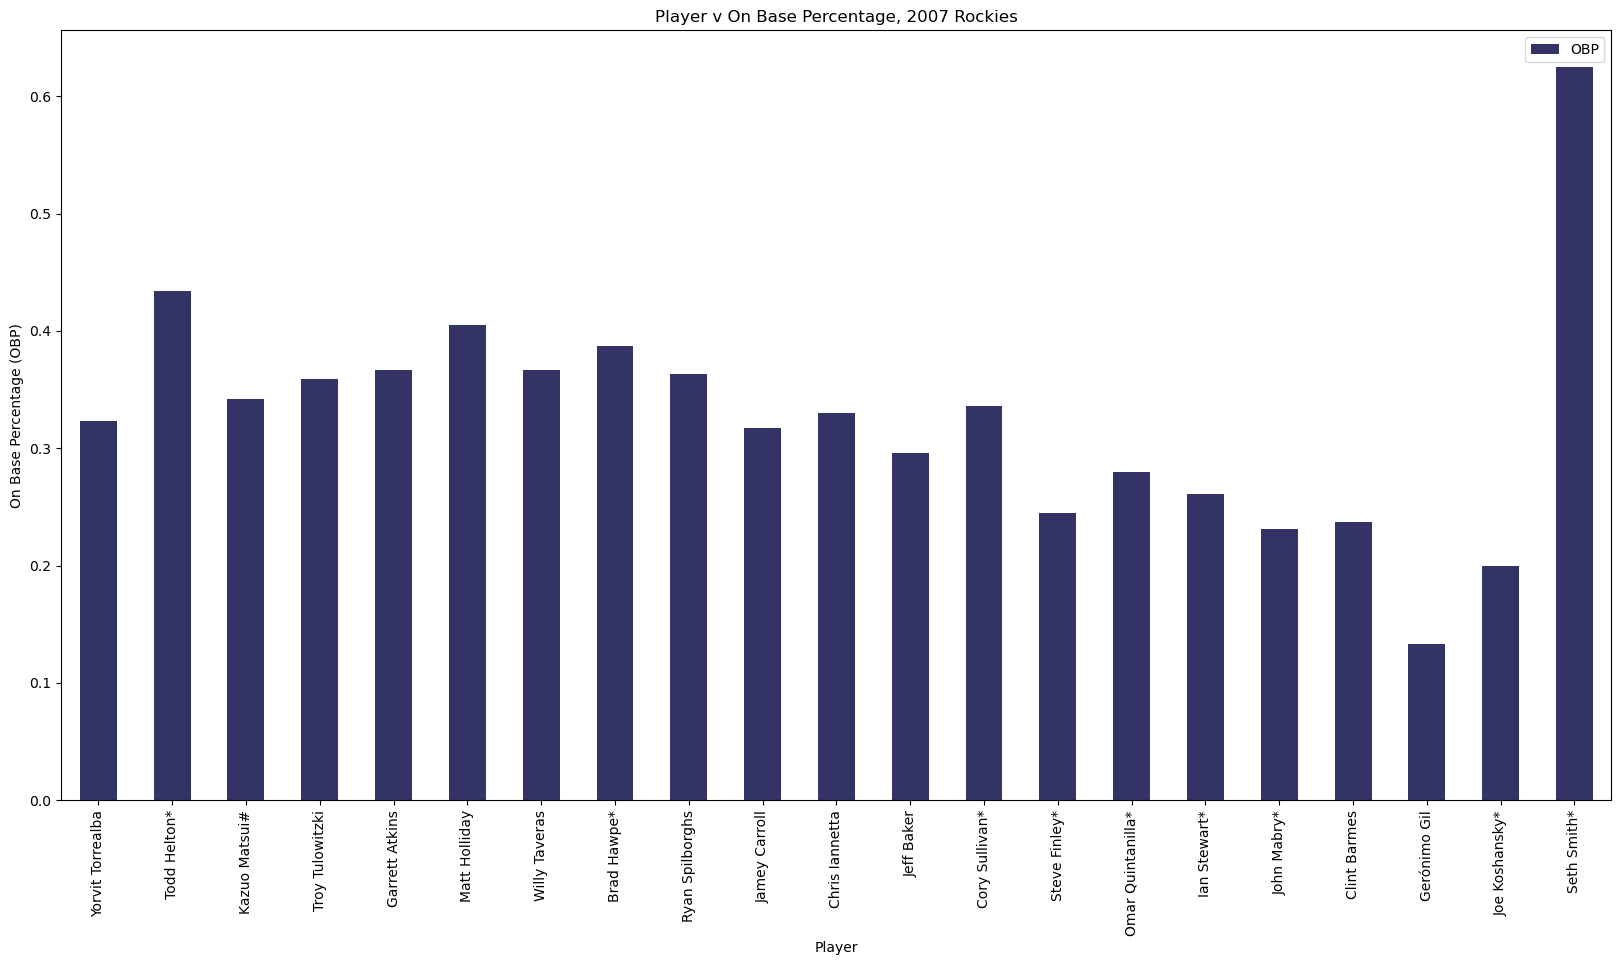

In [8]:
# Plotting the '07 batting data in a bar chart to view players and their on base percentage.
batting_2007.plot(x="Name",
                  y="OBP",
                  kind="bar",
                  title="Player v On Base Percentage, 2007 Rockies",
                  ylabel="On Base Percentage (OBP)",
                  xlabel="Player",
                  figsize= [20,10],
                  color=ls.Rockies_Purple_Hex)

<Axes: title={'center': 'Player v On Base Percentage, 2024 Rockies'}, xlabel='Player', ylabel='On Base Percentage (OBP)'>

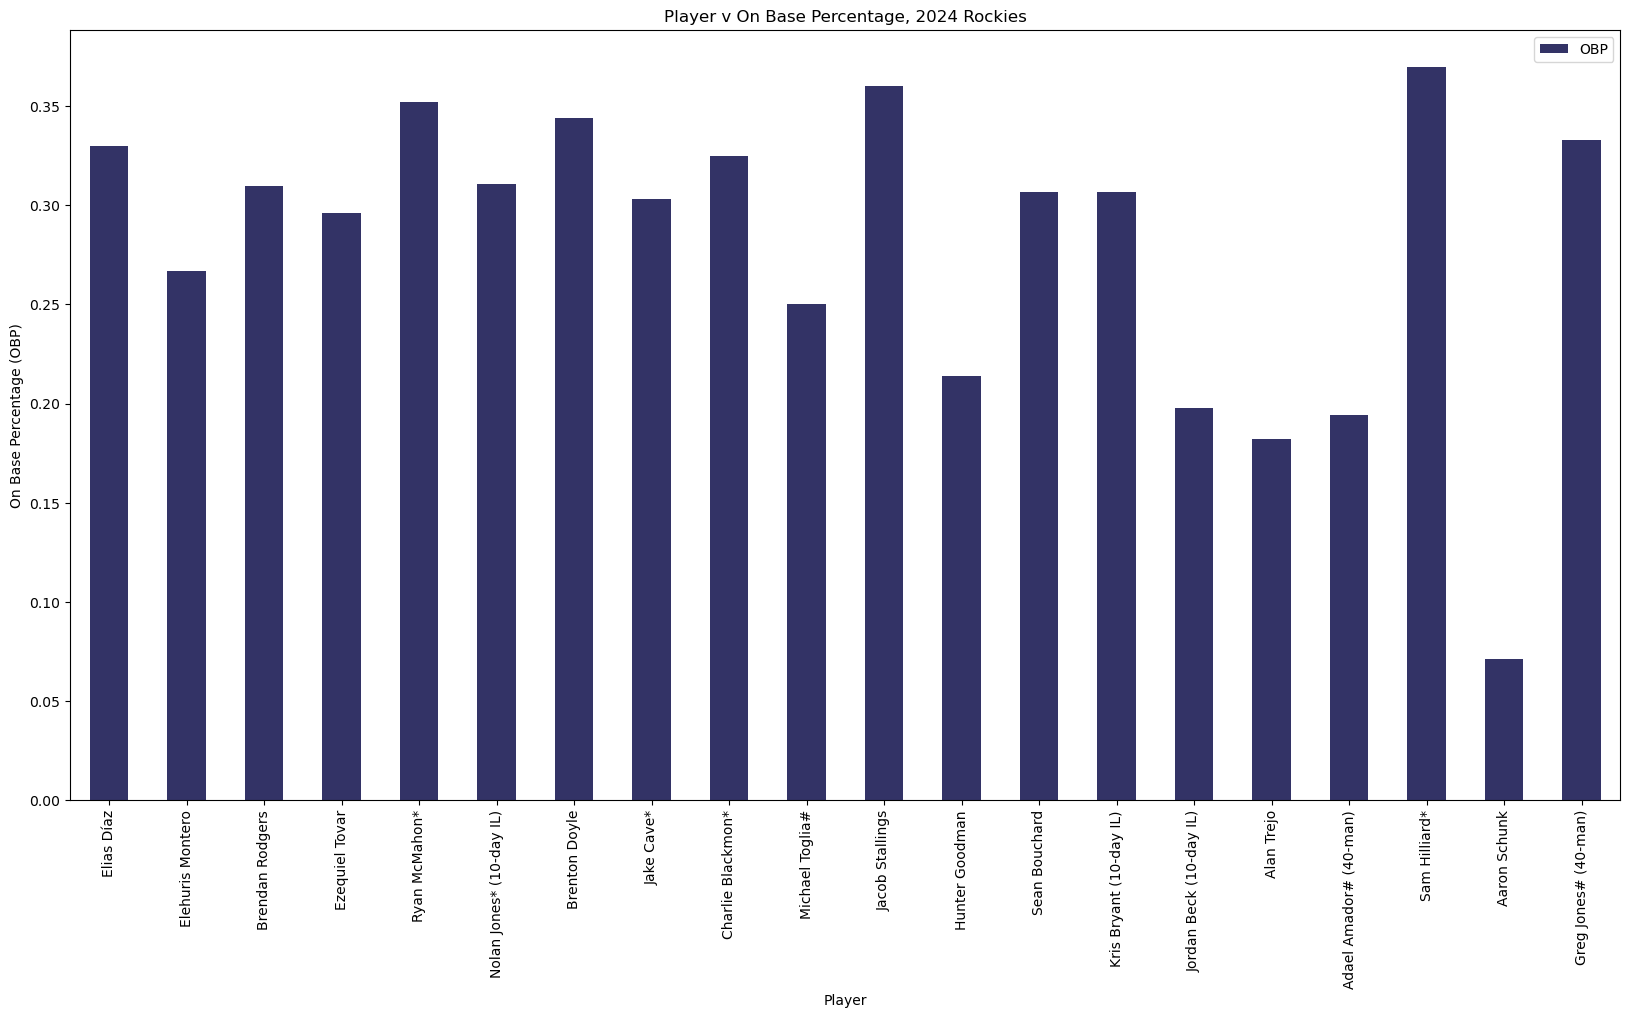

In [9]:
# Plotting the '24 batting data in a bar chart to view players and their on base percentage.
batting_2024.plot(x="Name",
                  y="OBP",
                  kind="bar",
                  title="Player v On Base Percentage, 2024 Rockies",
                  ylabel="On Base Percentage (OBP)",
                  xlabel="Player",
                  figsize= [20,10],
                  color=ls.Rockies_Purple_Hex)

In [15]:
# Finding and printing the on base percentage average between the two years
print(f"The average On Base Percentage for 2007 was {batting_2007['OBP'].mean():,.2f},\n" 
      f"while in 2024, the On Base Percentage is {batting_2024['OBP'].mean():,.2f}.")

The average On Base Percentage for 2007 was 0.33,
while in 2024, the On Base Percentage is 0.28.


In [18]:
# Prepping the data to be concatnated.

#Adding a column to signal which year the data is from and making sure that both columns were added correctly.

batting_2007["Year"]=2007
batting_2024["Year"]=2024
display(batting_2007.head(3))
display(batting_2007.columns)
display(batting_2007.dtypes)
display(batting_2024.head(3))
display(batting_2024.columns)
display(batting_2024.dtypes)

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Year
0,1.0,C,Yorvit Torrealba,28.0,113.0,443.0,396.0,47.0,101.0,22.0,...,0.376,0.699,76.0,149.0,19.0,6.0,6.0,1.0,1.0,2007
1,2.0,1B,Todd Helton*,33.0,154.0,682.0,557.0,86.0,178.0,42.0,...,0.494,0.928,133.0,275.0,15.0,2.0,0.0,7.0,16.0,2007
2,3.0,2B,Kazuo Matsui#,31.0,104.0,453.0,410.0,84.0,118.0,24.0,...,0.405,0.746,87.0,166.0,1.0,0.0,8.0,1.0,1.0,2007


Index(['Rk', 'Pos', 'Name', 'Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Year'],
      dtype='object')

Rk      float64
Pos      object
Name     object
Age     float64
G       float64
PA      float64
AB      float64
R       float64
H       float64
2B      float64
3B      float64
HR      float64
RBI     float64
SB      float64
CS      float64
BB      float64
SO      float64
BA      float64
OBP     float64
SLG     float64
OPS     float64
OPS+    float64
TB      float64
GDP     float64
HBP     float64
SH      float64
SF      float64
IBB     float64
Year      int64
dtype: object

,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Year
0,1.0,C,Elias Díaz,33.0,67.0,267.0,248.0,21.0,71.0,14.0,...,0.403,0.733,99.0,100.0,9.0,3.0,0.0,2.0,2.0,2024
1,2.0,1B,Elehuris Montero,25.0,67.0,247.0,224.0,23.0,46.0,10.0,...,0.304,0.571,56.0,68.0,7.0,0.0,0.0,3.0,0.0,2024
2,3.0,2B,Brendan Rodgers,27.0,78.0,306.0,286.0,33.0,76.0,15.0,...,0.388,0.699,90.0,111.0,7.0,1.0,0.0,1.0,1.0,2024


Index(['Rk', 'Pos', 'Name', 'Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Year'],
      dtype='object')

Rk      float64
Pos      object
Name     object
Age     float64
G       float64
PA      float64
AB      float64
R       float64
H       float64
2B      float64
3B      float64
HR      float64
RBI     float64
SB      float64
CS      float64
BB      float64
SO      float64
BA      float64
OBP     float64
SLG     float64
OPS     float64
OPS+    float64
TB      float64
GDP     float64
HBP     float64
SH      float64
SF      float64
IBB     float64
Year      int64
dtype: object

In [19]:
# Concatnating the data on index.

batting_combined=pd.concat([batting_2007,batting_2024], axis=1)
display(batting_combined.head(5))
display(batting_combined.tail(5))


,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Year
0,1.0,C,Yorvit Torrealba,28.0,113.0,443.0,396.0,47.0,101.0,22.0,...,0.403,0.733,99.0,100.0,9.0,3.0,0.0,2.0,2.0,2024.0
1,2.0,1B,Todd Helton*,33.0,154.0,682.0,557.0,86.0,178.0,42.0,...,0.304,0.571,56.0,68.0,7.0,0.0,0.0,3.0,0.0,2024.0
2,3.0,2B,Kazuo Matsui#,31.0,104.0,453.0,410.0,84.0,118.0,24.0,...,0.388,0.699,90.0,111.0,7.0,1.0,0.0,1.0,1.0,2024.0
3,4.0,SS,Troy Tulowitzki,22.0,155.0,682.0,609.0,104.0,177.0,33.0,...,0.441,0.737,98.0,172.0,8.0,3.0,4.0,3.0,0.0,2024.0
4,5.0,3B,Garrett Atkins,27.0,157.0,684.0,605.0,83.0,182.0,35.0,...,0.451,0.802,118.0,160.0,7.0,2.0,0.0,2.0,2.0,2024.0


,Rk,Pos,Name,Age,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Year
18,18.0,UT,Clint Barmes,28.0,27.0,39.0,37.0,5.0,8.0,3.0,...,0.583,0.954,156.0,14.0,0.0,0.0,1.0,0.0,0.0,2024.0
19,19.0,C,Gerónimo Gil,31.0,5.0,16.0,14.0,1.0,1.0,0.0,...,0.071,0.143,-61.0,1.0,0.0,0.0,0.0,0.0,0.0,2024.0
20,20.0,1B,Joe Koshansky*,25.0,17.0,15.0,12.0,0.0,1.0,1.0,...,0.800,1.133,197.0,4.0,0.0,0.0,0.0,0.0,0.0,2024.0
21,21.0,RF,Seth Smith*,24.0,7.0,8.0,8.0,4.0,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.420,0.745,102.0,110.0,2.0,5.0,0.0,0.0,2.0,2024.0


In [20]:
print(batting_combined.columns)

Index(['Rk', 'Pos', 'Name', 'Age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'Year', 'Rk', 'Pos', 'Name', 'Age',
       'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB',
       'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF',
       'IBB', 'Year'],
      dtype='object')


In [21]:
# Grouping the combined data frame by position.
grouped_df_pos= batting_combined.groupby("Pos")
grouped_df_pos.head()

ValueError: Grouper for 'Pos' not 1-dimensional